In [1]:
import tensorflow as tf
import numpy as np

In [2]:
x = tf.ones(shape=(2,1))
x

<tf.Tensor: shape=(2, 1), dtype=float32, numpy=
array([[1.],
       [1.]], dtype=float32)>

In [3]:
x = tf.random.normal(shape=(3,1),mean=0,stddev=1)
np.mean(x)

0.71842647

In [4]:
x = tf.random.uniform(shape=(3,1),minval=0,maxval=1)
x

<tf.Tensor: shape=(3, 1), dtype=float32, numpy=
array([[0.75069344],
       [0.3195212 ],
       [0.21629131]], dtype=float32)>

In [5]:
# numpy에 값 할당
x = np.ones(shape=(2,2))
x[0,0] = 0
x

array([[0., 1.],
       [1., 1.]])

In [6]:
# Tensorflow 변수 만들기
v = tf.Variable(initial_value=tf.random.normal(shape=(3,1)))
v

<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[-0.8815106 ],
       [-0.4871253 ],
       [ 0.26032403]], dtype=float32)>

In [7]:
v.assign(tf.ones((3,1)))
v

<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[1.],
       [1.],
       [1.]], dtype=float32)>

In [8]:
# 변수 일부에 값 할당
v[0,0].assign(3)
v

<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[3.],
       [1.],
       [1.]], dtype=float32)>

In [9]:
v.assign_add(tf.ones((3,1)))
v

<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[4.],
       [2.],
       [2.]], dtype=float32)>

In [10]:
# Tensorflow 기본적인 수학연산
a = tf.ones((2,2))
print(a)
b = tf.square(a)
print(b)
c = tf.sqrt(b)
print(c)
d = b + c
print(d)
e = tf.matmul(a,d)
print(e)
e *= d
print(e)

tf.Tensor(
[[1. 1.]
 [1. 1.]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[1. 1.]
 [1. 1.]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[0.99999994 0.99999994]
 [0.99999994 0.99999994]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[2. 2.]
 [2. 2.]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[4. 4.]
 [4. 4.]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[8. 8.]
 [8. 8.]], shape=(2, 2), dtype=float32)


In [11]:
from numpy.lib.function_base import gradient

# GradientTape 사용
input_var = tf.Variable(initial_value=3.)
with tf.GradientTape() as tape:
    result = tf.square(input_var)
    gradient = tape.gradient(result,input_var)

In [12]:
input_const = tf.constant(3.)
with tf.GradientTape() as tape:
    result = tf.square(input_var)
    gradient = tape.gradient(result,input_var)

In [13]:
# 중첩
time = tf.Variable(0.)
with tf.GradientTape() as outer_tape:
    with tf.GradientTape() as inner_tape:
        position = 4.9*time**2
        speed = inner_tape.gradient(position,time)
        acceleration = outer_tape.gradient(speed,time)

In [14]:
# Tensorflow 선형 분류기
num_samples_per_class = 1000
negative_samples = np.random.multivariate_normal(
    mean = [0,3],
    cov = [[1,0.5],[0.5,1]],
    size = num_samples_per_class
)
positive_samples = np.random.multivariate_normal(
    mean = [3,0],
    cov = [[1,0.5],[0.5,1]],
    size = num_samples_per_class
)

In [15]:
negative_samples.shape

(1000, 2)

In [16]:
# 한 배열에 쌓기
inputs = np.vstack((negative_samples,positive_samples)).astype(np.float32)

In [17]:
inputs.shape

(2000, 2)

In [18]:
# 0과 1로 되어있는 타깃을 구성
targets = np.vstack((np.zeros((1000,1),dtype='float32'),
                     np.ones((1000,1),dtype='float32')))

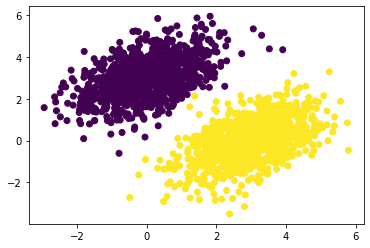

In [19]:
# 샘플 데이터 시각화
import matplotlib.pyplot as plt
plt.scatter(inputs[:,0],inputs[:,1],c=targets[:,0])
plt.show()

In [20]:
from prompt_toolkit import output
# 선형 분류기의 변수
input_dim = 2
output_dim = 1
W = tf.Variable(initial_value=tf.random.uniform(shape=(input_dim,output_dim)))
b = tf.Variable(initial_value=tf.zeros(shape=(output_dim,)))

In [21]:
# 정방향 패스 함수
def model(inputs):
    return tf.matmul(inputs,W) + b

In [22]:
# 평균 제곱 오차 손실함수
def squared_loss(target,predictions):
    per_sample_losses = tf.square(target-predictions)
    return tf.reduce_mean(per_sample_losses)

In [23]:
# 훈련스텝 함수
learning_rate = 0.1
def training_step(inputs, targets):
    with tf.GradientTape() as tape:
        predictions = model(inputs)
        loss = squared_loss(targets,predictions)
    grad_loss_wrd_W, grad_loss_wrd_b = tape.gradient(loss,[W,b])
    W.assign_sub(grad_loss_wrd_W*learning_rate)
    b.assign_sub(grad_loss_wrd_b*learning_rate)
    return loss

In [24]:
for step in range(40):
    loss = training_step(inputs, targets)
    print(f"{step}번째 스텝의 손실 : {loss:.4f}")

0번째 스텝의 손실 : 1.9987
1번째 스텝의 손실 : 0.3225
2번째 스텝의 손실 : 0.1389
3번째 스텝의 손실 : 0.1115
4번째 스텝의 손실 : 0.1021
5번째 스텝의 손실 : 0.0952
6번째 스텝의 손실 : 0.0892
7번째 스텝의 손실 : 0.0836
8번째 스텝의 손실 : 0.0785
9번째 스텝의 손실 : 0.0739
10번째 스텝의 손실 : 0.0696
11번째 스텝의 손실 : 0.0658
12번째 스텝의 손실 : 0.0622
13번째 스텝의 손실 : 0.0589
14번째 스텝의 손실 : 0.0560
15번째 스텝의 손실 : 0.0532
16번째 스텝의 손실 : 0.0507
17번째 스텝의 손실 : 0.0485
18번째 스텝의 손실 : 0.0464
19번째 스텝의 손실 : 0.0445
20번째 스텝의 손실 : 0.0427
21번째 스텝의 손실 : 0.0411
22번째 스텝의 손실 : 0.0396
23번째 스텝의 손실 : 0.0383
24번째 스텝의 손실 : 0.0371
25번째 스텝의 손실 : 0.0359
26번째 스텝의 손실 : 0.0349
27번째 스텝의 손실 : 0.0340
28번째 스텝의 손실 : 0.0331
29번째 스텝의 손실 : 0.0323
30번째 스텝의 손실 : 0.0316
31번째 스텝의 손실 : 0.0309
32번째 스텝의 손실 : 0.0303
33번째 스텝의 손실 : 0.0298
34번째 스텝의 손실 : 0.0293
35번째 스텝의 손실 : 0.0288
36번째 스텝의 손실 : 0.0284
37번째 스텝의 손실 : 0.0280
38번째 스텝의 손실 : 0.0277
39번째 스텝의 손실 : 0.0273


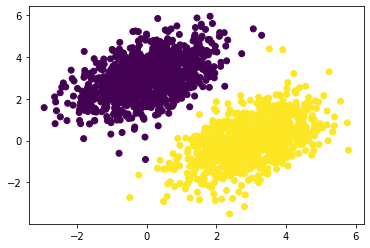

tf.Tensor([0.12552941], shape=(1,), dtype=float32) tf.Tensor([0.7635145], shape=(1,), dtype=float32)


In [25]:
start_end = [[-4.,-4.],[6.,6.]]
line_data = model(start_end)

predictions = model(inputs)
plt.scatter(inputs[:,0],inputs[:,1], c=predictions[:,0] > 0.5)
plt.plot(line_data[0],line_data[1],'-r')
plt.show()
print(line_data[0],line_data[1])

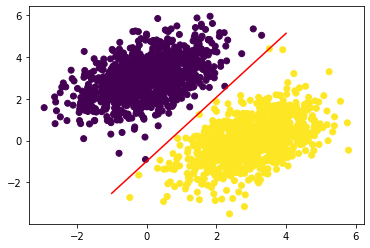

In [26]:
# [-1,4]
x = np.linspace(-1,4,100)
y = -W[0] / W[1] * x + (0.5-b) / W[1]
plt.plot(x,y,'-r')
plt.scatter(inputs[:,0],inputs[:,1], c=predictions[:,0] > 0.5)
plt.plot(line_data[0],line_data[1],'-r')

In [27]:
from tensorflow import keras
class SimpleDense(keras.layers.Layer):
    def __init__(self,units,activation=None):
        super().__init__()
        self.units = units
        self.activation = activation
    def build(self, input_shape):
        input_dim = input_shape[-1]
        self.W = self.add_weight(shape=(input_dim, self.units),initializer='random_normal')
        self.b = self.add_weight(shape=(self.units),initializer ='zeros')
    def call(self, inputs):
        y = tf.matmul(inputs, self.W) + self.b
        if self.activation is not None:
            y = self.activation(y)
        return y

In [28]:
my_dense = SimpleDense(units= 32, activation=tf.nn.relu)
input_tensor = tf.ones(shape = (2,784))
output_tensor = my_dense(input_tensor)
output_tensor.shape

TensorShape([2, 32])

In [29]:
from tensorflow.keras import models, layers
model = models.Sequential([
    layers.Dense(32,activation='relu'),
    layers.Dense(32)
    ])

In [30]:
model = models.Sequential([
    SimpleDense(32,activation='relu'),
    SimpleDense(64,activation='relu'),
    SimpleDense(32,activation='relu'),
    SimpleDense(10,activation='relu')
])

In [31]:
# 학습과정 설계
model = keras.Sequential([keras.layers.Dense(1)])
model.compile(optimizer = 'adam',loss='mse',metrics=['acc'])

In [32]:
hist = model.fit(inputs,targets,epochs=5,batch_size=128)

Epoch 1/5
16/16 [==============================] - 0s 440us/step - loss: 4.9530 - acc: 0.9875
Epoch 2/5
16/16 [==============================] - 0s 265us/step - loss: 4.7310 - acc: 0.9875
Epoch 3/5
16/16 [==============================] - 0s 295us/step - loss: 4.5202 - acc: 0.9875
Epoch 4/5
16/16 [==============================] - 0s 1ms/step - loss: 4.3137 - acc: 0.9875
Epoch 5/5
16/16 [==============================] - 0s 1ms/step - loss: 4.1171 - acc: 0.9870


In [33]:
hist.history

{'loss': [4.952981472015381,
  4.730991363525391,
  4.520247936248779,
  4.313675880432129,
  4.1170759201049805],
 'acc': [0.987500011920929,
  0.987500011920929,
  0.987500011920929,
  0.987500011920929,
  0.9869999885559082]}